# Варіант 45

In [1]:
K = 45

# Підготовка

## Імпорт потрібних модулей

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Зчитування даних

In [3]:
df = pd.read_csv('requests.csv')
# remove empty rows
df.dropna(inplace=True)
df.head()

,Date,Requests,Country
0,1 жовтня,187.0,Ukrainian
1,2 жовтня,126.0,Ukrainian
2,3 жовтня,141.0,Ukrainian
3,4 жовтня,154.0,Ukrainian
4,5 жовтня,167.0,Ukrainian


## Допоміжні функції

In [4]:
def laplace_transform(x):
    """
    Computes value of F(x), where F is 
    a Laplace Function
    """
    return st.norm.sf(-x) - 0.5

# Завдання

## Завдання А. Використовуючи статистичні дані обчислити:

### 1. Точкову оцінку математичного сподівання, зміщену та незміщену оцінку дисперсії   
Математичне сподівання розраховуємо за формулою: $$E[X] = \frac{1}{n}\sum_{i=1}^nx_ip_i$$
Дисперсію розрахуємо за формулою: $$\sigma^2 = \frac{\sum_{i=1}^n(x-E[X])^2}{n}$$
Незміщену дисперсію розрахуємо за формулою: $$s^2 = \frac{\sum_{i=1}^n(x-E[X])^2}{n-1}$$

In [5]:
# ddof = degrees of freedom
E, D, S = df['Requests'].mean(), df['Requests'].var(ddof=0), df['Requests'].var(ddof=1)
print(f'{"Mean:":5}', E)
print(f'{"D:":5}', D)
print(f'{"S:":5}', S)

Mean: 136.01612903225808
D:    275.3061914672216
S:    279.8194077207826


### 2. Довірчий інтервал для математичного сподівання та дисперсії в припущенні, що вибірка з нормального закону розподілу (з надійністю $\gamma = 1 - \frac{K}{200}$)


Довірчий інтервал $CI$ (Confidece Interval) для математичного сподівання розрахуємо за формулою: $$CI_{mean} = E[x]\pm t\frac{s}{\sqrt{n}},$$
де $t$ - розв'язок рівняння: $$\Phi(t) = \frac{\gamma}{2} \Rightarrow t = 1.21 \;\text{(табл)}$$
Довірчий інтервал $CI$ (Confidece Interval) для дисперсії розрахуємо за формулою: $$CI_{variance}=\frac{(n-1)S}{\chi^2_{1-\frac{\gamma}{2}, df}} \le\sigma^2\le\frac{(n-1)S}{\chi^2_{\frac{\gamma}{2}, df}}$$


In [6]:
gamma = 1 - K / 200
t = 1.21
s = np.sqrt(S)
n = len(df['Requests'])
# degrees of freedom
deg = n - 1
print(f'{gamma=}')
print(f'{t=}')
print(f'{s=:.2f}')
print(f'{n=}')
print(f'{deg=}')

gamma=0.775
t=1.21
s=16.73
n=62
deg=61


In [7]:
# calculate CI for mean
ci_mean = t * (s / np.sqrt(n))
low_mean = round(E - ci_mean, 4) 
high_mean = round(E + ci_mean, 4)
print(f'E[X] in {(low_mean, high_mean)} with confidence {gamma}')

E[X] in (133.4456, 138.5867) with confidence 0.775


Тут функція `st.chi2.ppf(alpha, df)` обраховує значення статистики $\chi^2$ з рівнем значимості $\alpha$ та $df$ ступенями свободи.

In [8]:
# calculate CI of variance
low_var = (n - 1) * S / st.chi2.ppf(1 - gamma / 2, deg)
low_var = round(low_var, 4)
high_var = (n - 1) * S / st.chi2.ppf(gamma / 2, deg)
high_var = round(high_var, 4)
print(f'Var[X] in {(low_var, high_var)} with confidence {gamma}')

Var[X] in (268.6914, 298.1389) with confidence 0.775


### 3. Моду, медіану, розмах вибірки, нижній та верхній квартилі

In [9]:
modes = list(df['Requests'].mode())
lq, median, uq = df['Requests'].quantile([0.25, 0.5, 0.75])
rng = df['Requests'].max() - df['Requests'].min()
print('Mode(s):', modes)
print(f'Lower Quartile:', lq)
print(f'Median:', median)
print(f'Upper Quartile:', uq)
print(f'Sample Range:', rng)

Mode(s): [127.0, 147.0]
Lower Quartile: 127.0
Median: 137.5
Upper Quartile: 145.0
Sample Range: 92.0


## Завдання Б. Побудувати:

### 1. Гістограми абсолютних та відносних частот (окремо для українських та закордонних користувачів).

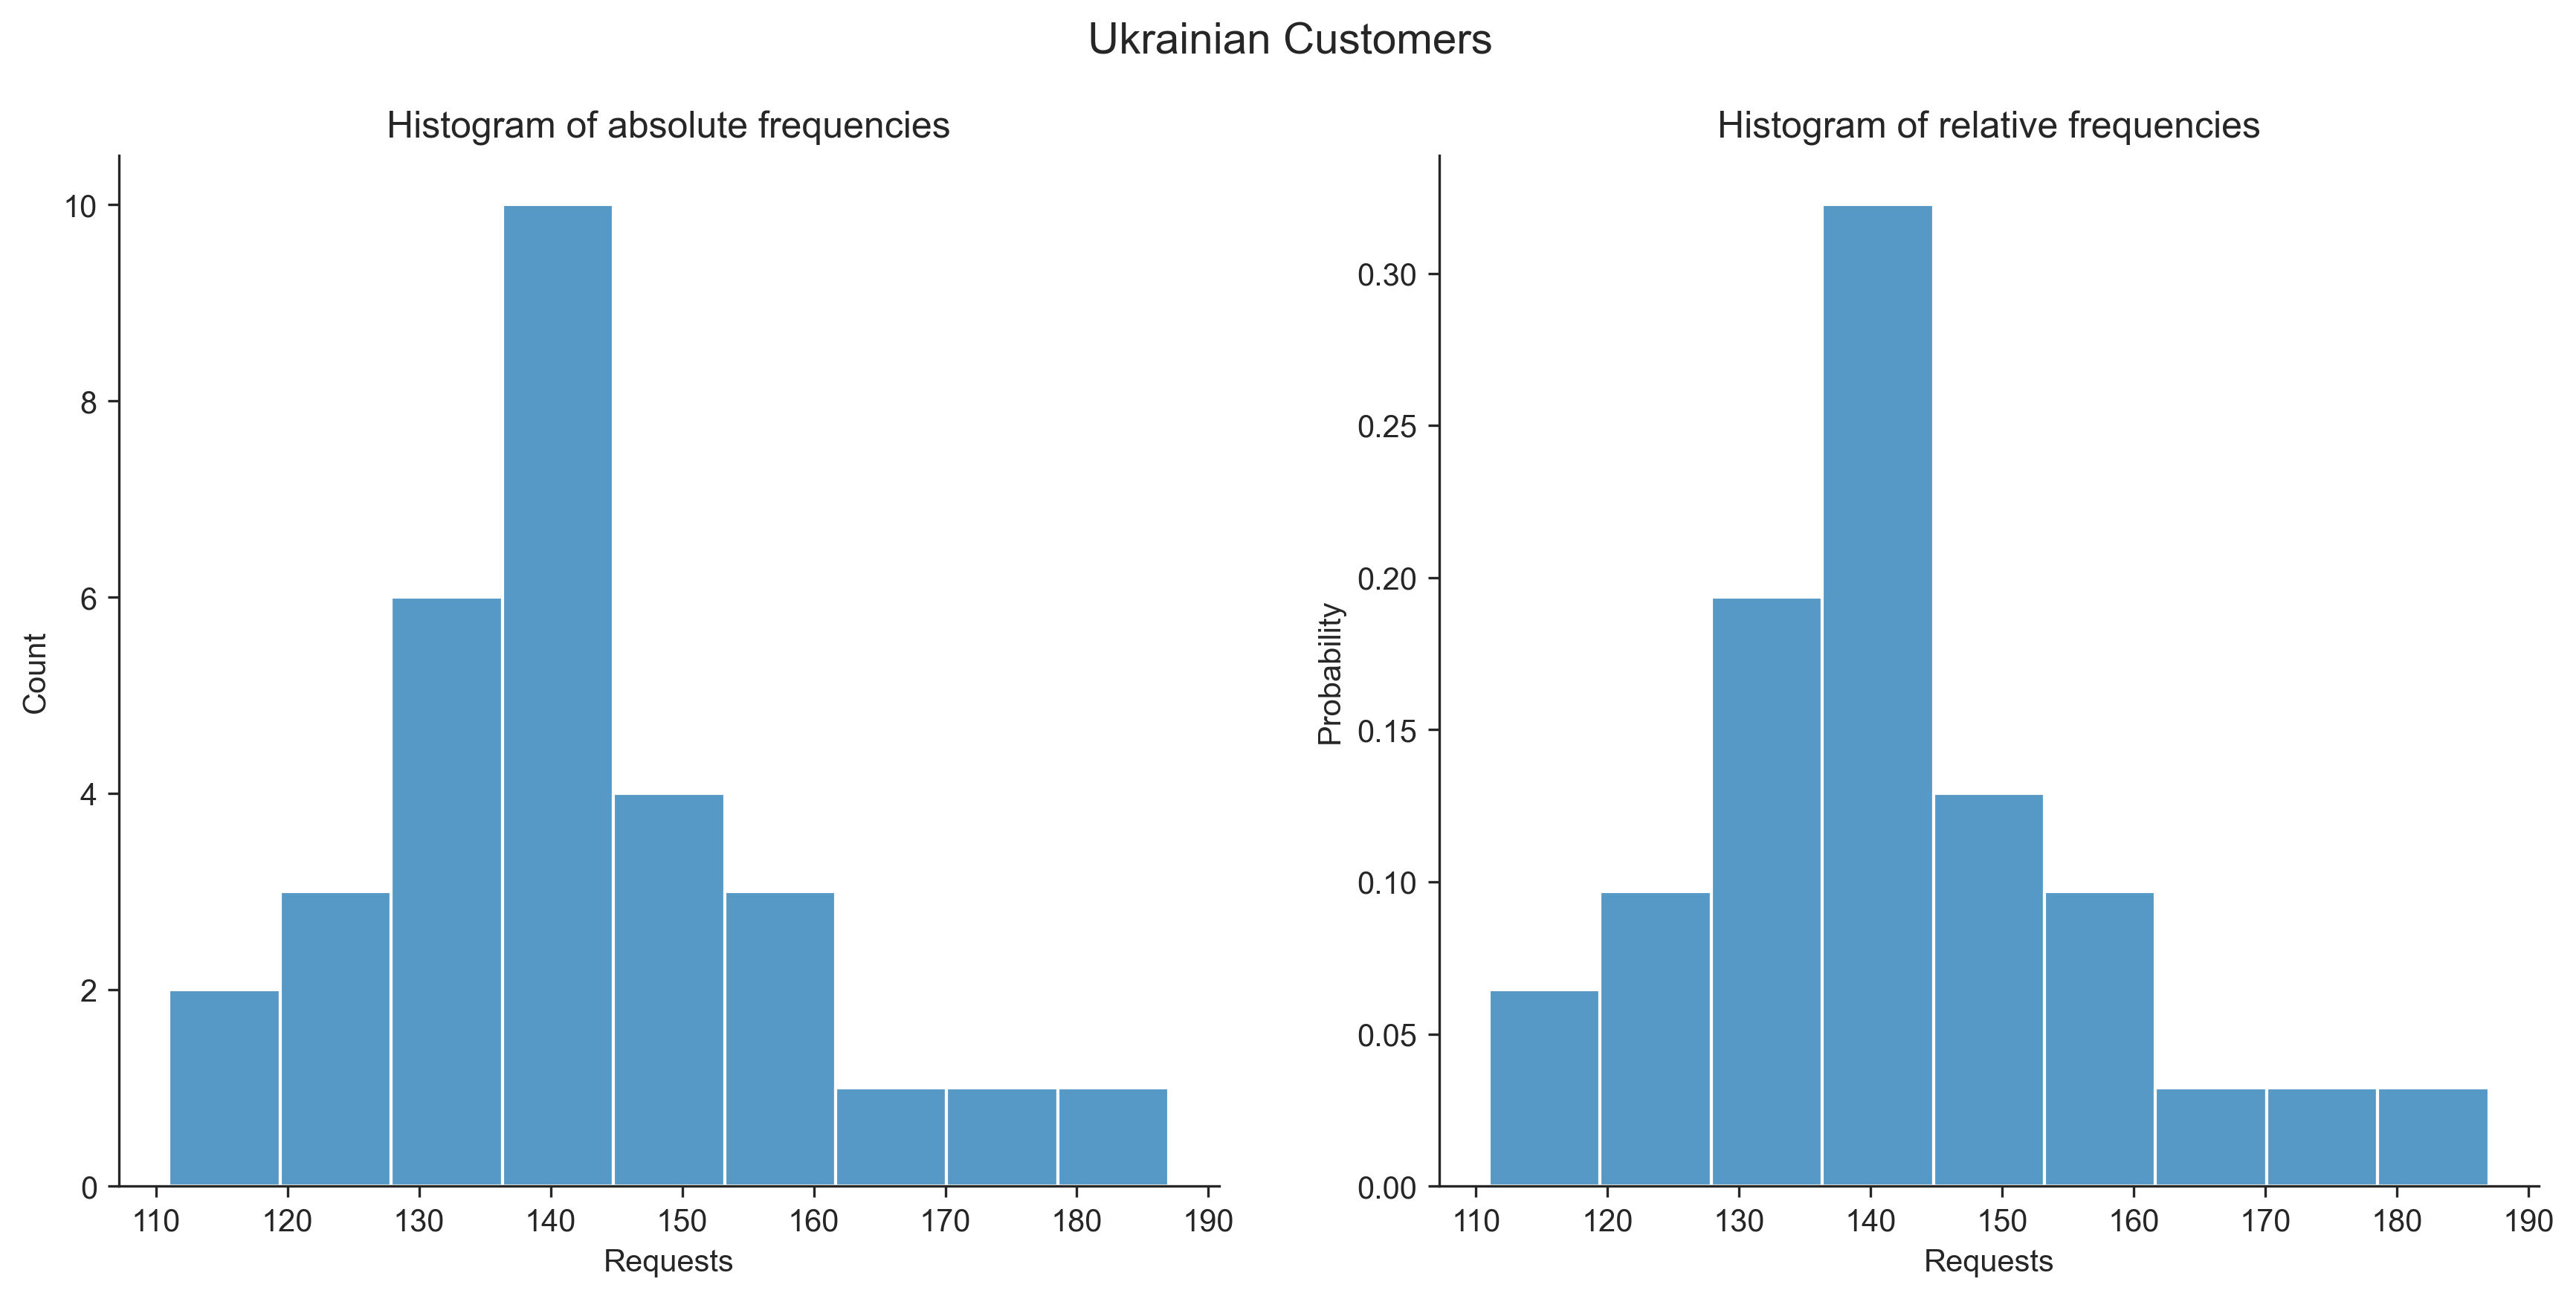

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
fig.suptitle('Ukrainian Customers', fontsize=14)
ax[0].set_title('Histogram of absolute frequencies')
ukr_requests = df[df['Country'] == 'Ukrainian']['Requests']
sns.histplot(x=ukr_requests, ax=ax[0])
ax[1].set_title('Histogram of relative frequencies')
sns.histplot(x=ukr_requests, ax=ax[1],  stat='probability')
sns.despine()

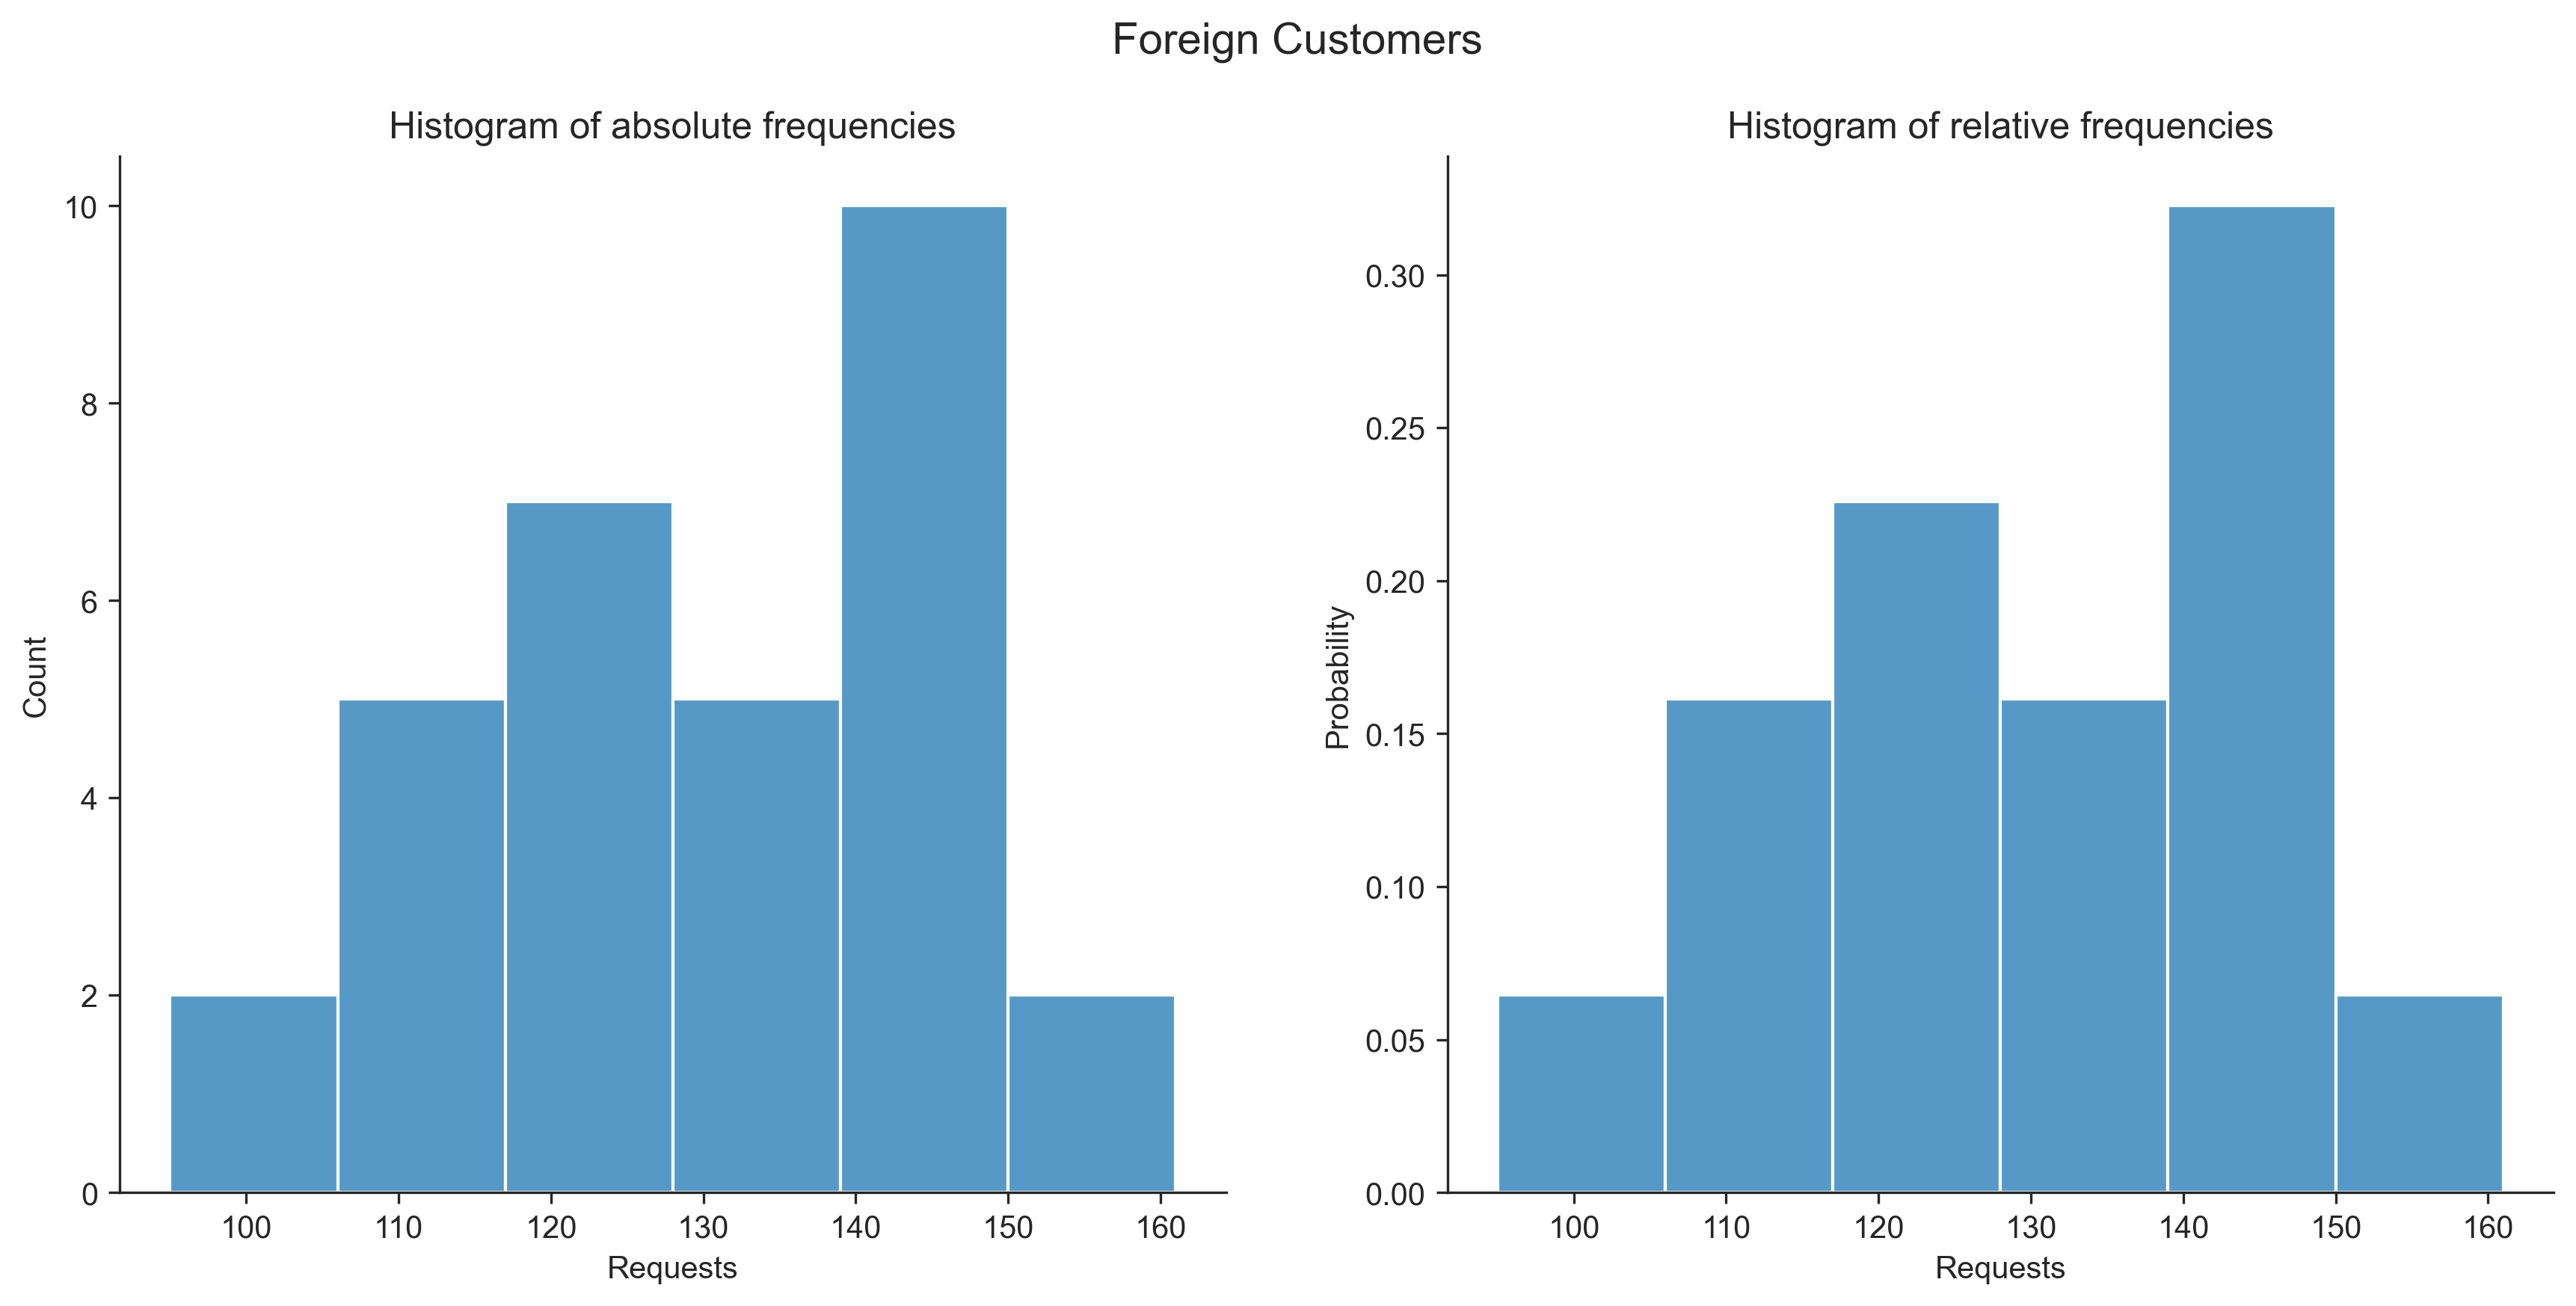

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
fig.suptitle('Foreign Customers', fontsize=14)
ax[0].set_title('Histogram of absolute frequencies')
foreign_requests = df[df['Country'] == 'Other']['Requests']
sns.histplot(x=foreign_requests, ax=ax[0])
ax[1].set_title('Histogram of relative frequencies')
sns.histplot(x=foreign_requests, ax=ax[1],  stat='probability')
sns.despine()

### 2. Два види боксплотів (“середнє, s, 1,96s” та “медіана,Q1-Q3, min-max”). Боксплоти будувати окремо для українських та закордонних користувачів, однак на одному рисунку і з дотриманням пропорцій.

Я не знайшов варіанту, як в `Python` можна зробити boxplot, який показував би $\overline{x}$, $s$ та $1,96s$. Тому на другому графіку наводжу `PointPlot`, який дає змогу показати потрібні характеристики.

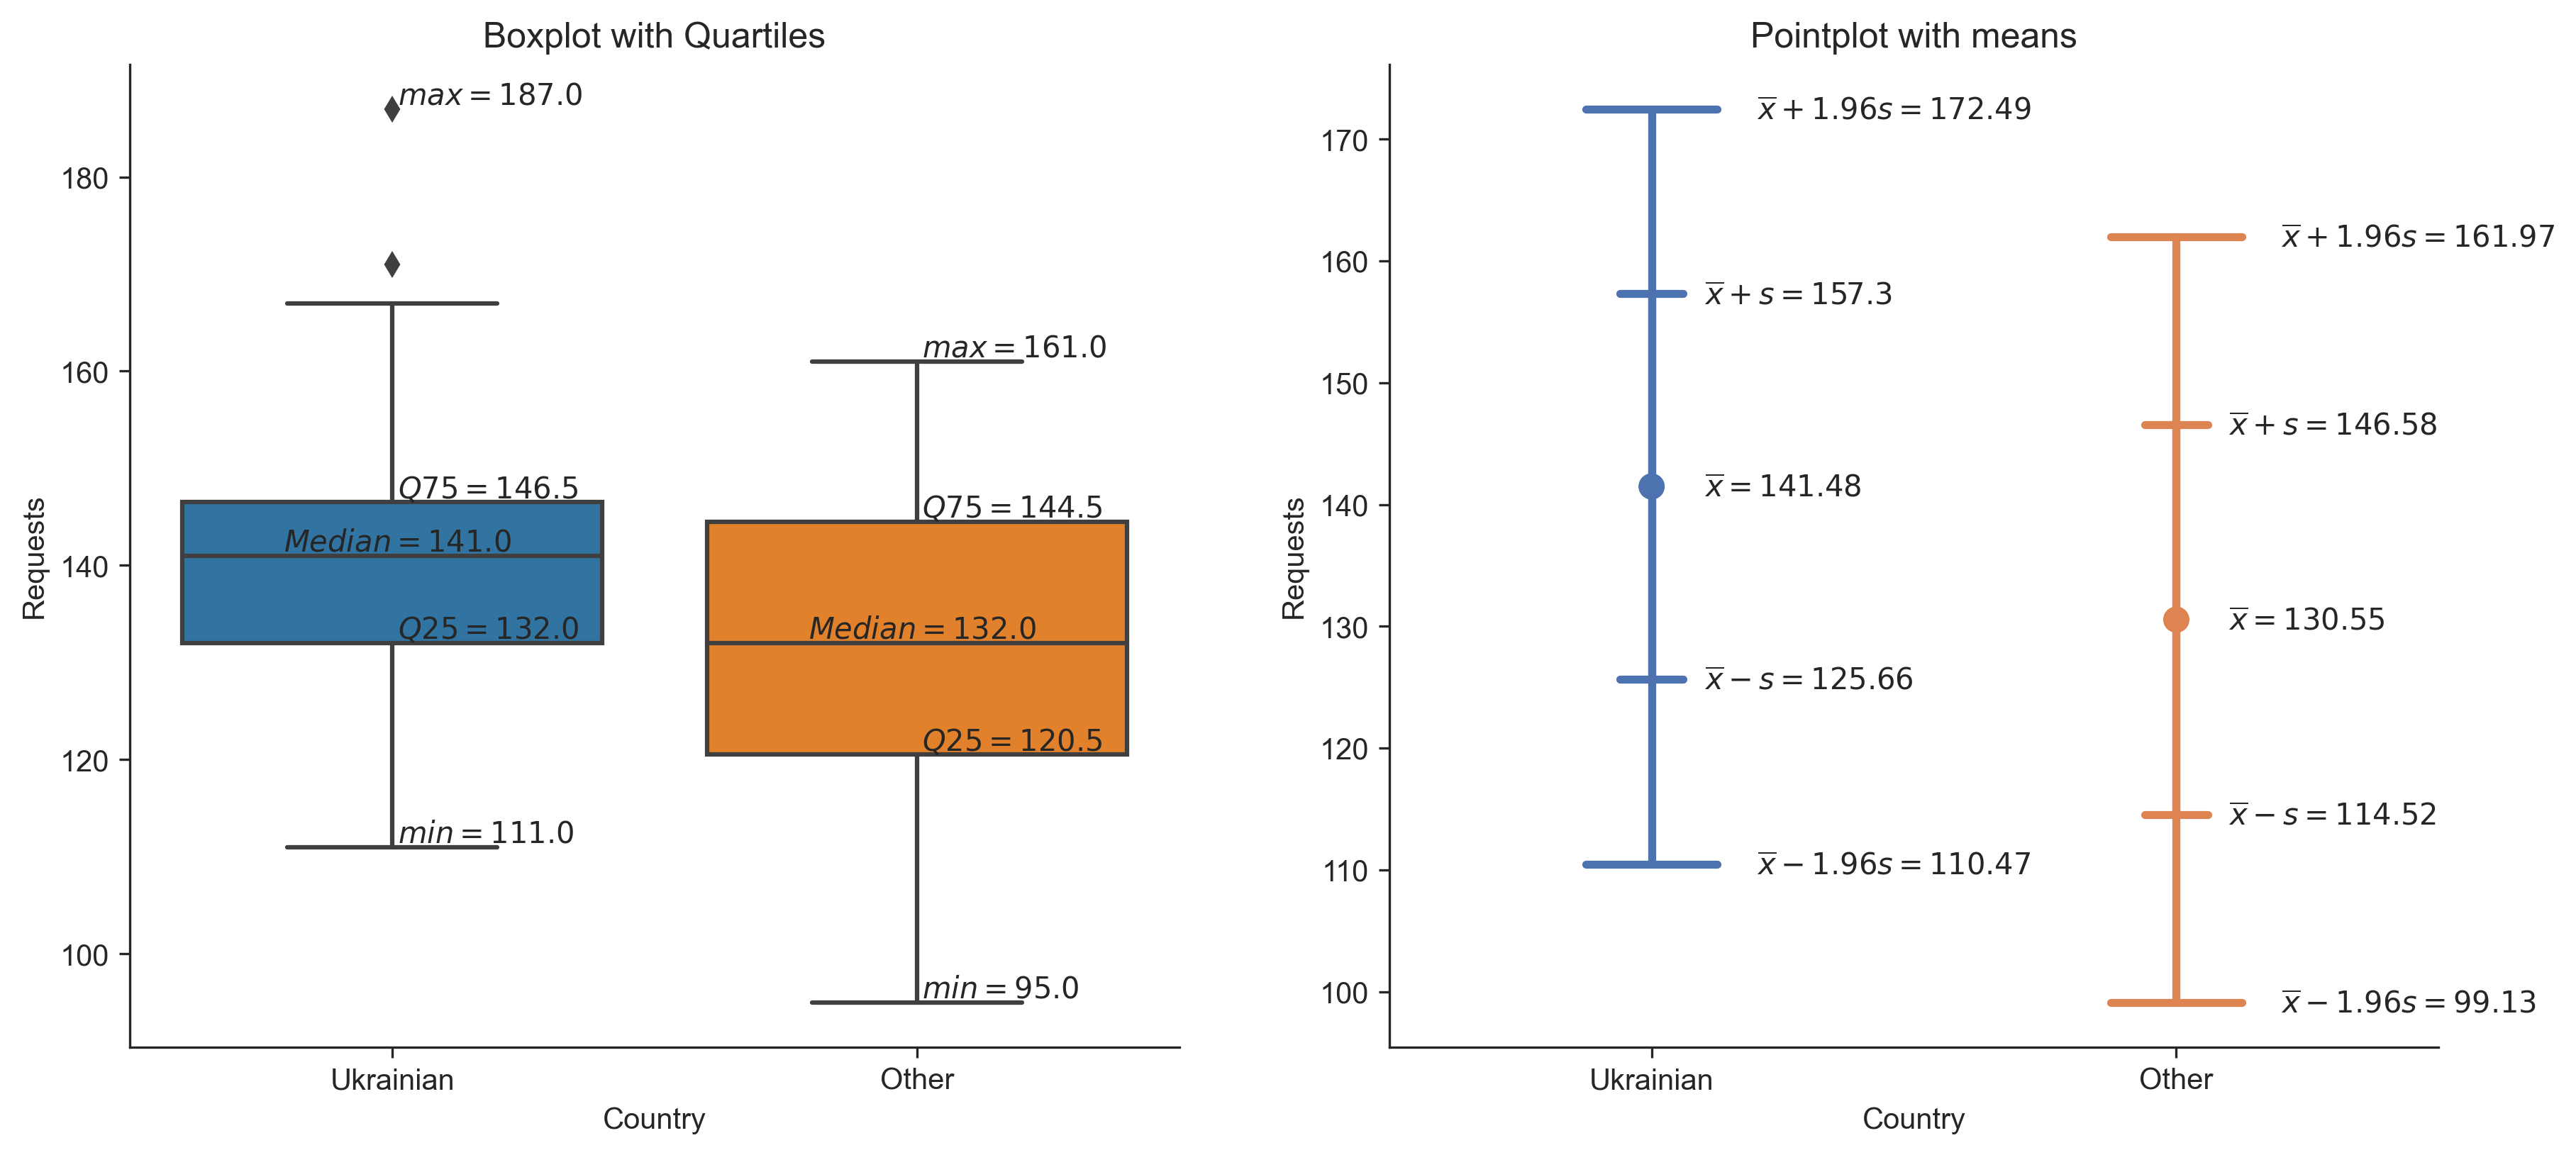

In [12]:
# --------- BoxPlot -------------
fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
ax[0].set_title('Boxplot with Quartiles')
box_plot = sns.boxplot(data=df, y='Requests', x='Country', ax=ax[0])

# Annotations
q25 = lambda x: x.quantile(.25)
q75 = lambda x: x.quantile(.75)
s_1 = df.groupby('Country')['Requests'].agg(
    [('Min', 'min'), ('Q25', q25), ('Median', 'median'), ('Q75', q75), ('Max', 'max')]
).reindex(['Ukrainian', 'Other'])
for i in range(len(s_1.Min)):
    box_plot.annotate('$min=%s$' % s_1.Min[i], xy=(i+0.01, s_1.Min[i] + 0.5), ha='left')
for i in range(len(s_1.Q25)):
    box_plot.annotate('$Q25=%s$' % s_1.Q25[i], xy=(i+0.01, s_1.Q25[i] + 0.5), ha='left')
for i in range(len(s_1.Median)):
    box_plot.annotate('$Median=%s$' % s_1.Median[i], xy=(i+0.01, s_1.Median[i] + 0.5), ha='center')    
for i in range(len(s_1.Q75)):
    box_plot.annotate('$Q75=%s$' % s_1.Q75[i], xy=(i+0.01, s_1.Q75[i] + 0.5), ha='left')
for i in range(len(s_1.Max)):
    box_plot.annotate('$max=%s$' % s_1.Max[i], xy=(i+0.01, s_1.Max[i] + 0.5), ha='left')

# ---------- PointPlot -------------
ax[1].set_title('Pointplot with means')
pp_1 = sns.pointplot(data=df, y='Requests', x='Country', join=False, ax=ax[1], 
                     errorbar='sd', capsize=.12, palette='deep')
pp_2 = sns.pointplot(data=df, y='Requests', x='Country', join=False, ax=ax[1],
                     errorbar=('sd', 1.96), capsize=.25, palette='deep')
# Annotations
pps = (pp_1, pp_2)
s_2 = df.groupby('Country')['Requests'].agg(
    [('Mean', 'mean'), ('Std', 'std')]
).reindex(['Ukrainian', 'Other']).round(2)
for i, (pp, m) in enumerate(zip(pps, s_2.Mean)):
        pp.annotate('$\overline{x}=%s$' % m, xy=(i+.1, m - 0.8))
for i, (pp, m, s) in enumerate(zip(pps, s_2.Mean, s_2.Std)):
    high = round(m + s, 2)
    high2 = round(m + 1.96 * s, 2)
    low = round(m - s, 2) 
    low2 = round(m - 1.96 * s, 2)
    pp.annotate('$\overline{x}+s=%s$' % high, xy=(i+.1, high - 0.8))
    pp.annotate('$\overline{x}-s=%s$' % low, xy=(i+.1, low - 0.8))
    pp.annotate('$\overline{x}+1.96s=%s$' % high2, xy=(i+.2, high2 - 0.8))
    pp.annotate('$\overline{x}-1.96s=%s$' % low2, xy=(i+.2, low2 - 0.8))

sns.despine()

## Завдання В. З допомогою критерію Пірсона перевірити всі дані (62 спостереження) на нормальний закон розподілу.

Для перевірки даних за допомогою критерію $\chi^2$, сформулюємо такі гіпотези: $$H_0 - \text{емпіричний розподіл співпадає із заданим теоретичним розподілом}$$ $$H_1 - \text{емпіричний розподіл не співпадає із заданим теоретичним розподілом}$$

### 1. Поділимо вибірку на 8 інтервалів. Для кожного інтервалу знайдемо кількість значень які в нього потраплають, та його середину.

In [13]:
intervals, bins = pd.cut(df['Requests'], 8, right=False, retbins=True)
N = len(df['Requests'])
counts = intervals.value_counts().sort_index()
mids = [i.mid for i in counts.index]
print('Interval margins are:', bins)
int_df = pd.DataFrame({'$$n_i$$': counts, '$$x_i^*$$': mids})
int_df

Interval margins are: [ 95.    106.5   118.    129.5   141.    152.5   164.    175.5   187.092]


,$$n_i$$,$$x_i^*$$
"[95.0, 106.5)",2,100.750
"[106.5, 118.0)",7,112.250
"[118.0, 129.5)",12,123.750
"[129.5, 141.0)",14,135.250
"[141.0, 152.5)",20,146.750
"[152.5, 164.0)",4,158.250
"[164.0, 175.5)",2,169.750
"[175.5, 187.092)",1,181.296


### 2. Обчислюємо $\overline{x}^*$ та $s^*$

In [14]:
mids = int_df['$$x_i^*$$']
counts = int_df['$$n_i$$']
# dot - dot product of 2 vectors
mean_x = mids.dot(counts) / N
# variance
var = (mids ** 2).dot(counts) / N - mean_x ** 2
# sample deviation
s = np.sqrt(N / (N-1) * var)
print('Mean X:', mean_x)
print('S:', s)

Mean X: 136.36364516129032
S: 16.622787722740902


### 3. Переходимо до величини $Z$ вигляду: $$Z = \frac{X - \overline{x}^*}{s^*}$$

In [15]:
Z = (bins - mean_x) / s
int_df['$Z$'] = pd.IntervalIndex.from_breaks(Z, 'left')
int_df

,$$n_i$$,$$x_i^*$$,$Z$
"[95.0, 106.5)",2,100.750,"[-2.4883699323611372, -1.7965485488595385)"
"[106.5, 118.0)",7,112.250,"[-1.7965485488595385, -1.1047271653579398)"
"[118.0, 129.5)",12,123.750,"[-1.1047271653579398, -0.4129057818563412)"
"[129.5, 141.0)",14,135.250,"[-0.4129057818563412, 0.27891560164525747)"
"[141.0, 152.5)",20,146.750,"[0.27891560164525747, 0.9707369851468561)"
"[152.5, 164.0)",4,158.250,"[0.9707369851468561, 1.6625583686484549)"
"[164.0, 175.5)",2,169.750,"[1.6625583686484549, 2.3543797521500536)"
"[175.5, 187.092)",1,181.296,"[2.3543797521500536, 3.0517357067196658)"


### 4. Обчислюємо теоретичні частоти $n_i' = nP_i$, де $P_i = \Phi(z_{i+1}) - \Phi(z_i)$

In [16]:
pi = np.array([laplace_transform(Z[i + 1]) - laplace_transform(Z[i])
      for i in range(0, len(Z) - 1)])
ni = N * pi
int_df['$$P_i$$'] = pi
int_df["$$n_i'$$"] = ni
int_df

,$$n_i$$,$$x_i^*$$,$Z$,$$P_i$$,$$n_i'$$
"[95.0, 106.5)",2,100.750,"[-2.4883699323611372, -1.7965485488595385)",0.029787,1.846803
"[106.5, 118.0)",7,112.250,"[-1.7965485488595385, -1.1047271653579398)",0.098435,6.102986
"[118.0, 129.5)",12,123.750,"[-1.1047271653579398, -0.4129057818563412)",0.205199,12.722332
"[129.5, 141.0)",14,135.250,"[-0.4129057818563412, 0.27891560164525747)",0.270007,16.740458
"[141.0, 152.5)",20,146.750,"[0.27891560164525747, 0.9707369851468561)",0.224315,13.907540
"[152.5, 164.0)",4,158.250,"[0.9707369851468561, 1.6625583686484549)",0.117639,7.293630
"[164.0, 175.5)",2,169.750,"[1.6625583686484549, 2.3543797521500536)",0.038924,2.413264
"[175.5, 187.092)",1,181.296,"[2.3543797521500536, 3.0517357067196658)",0.008139,0.504631


### 5. Обчислюємо спостережуване  значення критерію $\chi^2_{спост}$  за формулою: $$\chi^2_{спост} = \sum_{i=1}^m\frac{(n_i - n_i')^2}{n_i'}$$ та критичне значення критерію $\chi^2_{кр}$ за формулою: $$\chi^2_{кр} = \chi^2(df, \alpha)\Rightarrow\chi^2_{кр} = \chi^2(5, 0.05) = 11.1 (табл.)$$

In [17]:
ni = int_df['$$n_i$$']
nii = int_df["$$n_i'$$"]
chi2_emp = ((ni - nii) ** 2 / nii).sum()
chi2_cr = 11.1
print('Chi2 Empicical:', chi2_emp)
print('Chi2 Critical', chi2_cr)

Chi2 Empicical: 5.347471670603977
Chi2 Critical 11.1


Як можемо побачити, наше емпіричне значення менше від критичного. Оскільки критерій $\chi^2$ є правостороннім, можемо прийняти гіпотезу $H_0$, а отже стверджувати, що емпіричний розподіл співпадає з із заданим теоретичним розподілом. Тобто досліджувана вибірка є нормально розподілена.

## Завдання Г. З допомогою критерію Манна-Уітні на рівні значущості ($\alpha=0,05$) перевірити гіпотезу про рівність кількості пакетів від українських користувачів (група1) та закордонних користувачів (група2) для перших двох тижнів жовтня.

Для перевірки даних за допомогою $U$-критерія Манна-Уітні, сформулюємо такі гіпотези: $$H_0 - \text{рівень досліджуваної ознаки у 2 групах статистично не відрізняється}$$ $$H_1 - \text{рівні досліджуваної ознаки у 2 групах істотно різні}$$

### 1. Виберемо потрібні групи користувачів

In [18]:
countries = df.Country.unique()
u_df = pd.concat(
    [df[df['Country'] == c].iloc[:14] for c in countries], ignore_index=True
)
u_df.sort_values('Requests', ignore_index=True, inplace=True)
u_df

,Date,Requests,Country
0,7 жовтня,105.0,Other
1,3 жовтня,107.0,Other
2,12 жовтня,112.0,Other
3,14 жовтня,119.0,Other
4,2 жовтня,126.0,Ukrainian
5,1 жовтня,127.0,Other
6,11 жовтня,129.0,Other
7,6 жовтня,129.0,Ukrainian
8,8 жовтня,131.0,Ukrainian
9,2 жовтня,132.0,Other


### 2. Присвоюємо ранги

In [19]:
u_df['Rank'] = st.rankdata(u_df['Requests'])
u_df

,Date,Requests,Country,Rank
0,7 жовтня,105.0,Other,1.0
1,3 жовтня,107.0,Other,2.0
2,12 жовтня,112.0,Other,3.0
3,14 жовтня,119.0,Other,4.0
4,2 жовтня,126.0,Ukrainian,5.0
5,1 жовтня,127.0,Other,6.0
6,11 жовтня,129.0,Other,7.5
7,6 жовтня,129.0,Ukrainian,7.5
8,8 жовтня,131.0,Ukrainian,9.0
9,2 жовтня,132.0,Other,10.0


### 3. Обчислюємо найбільшу рангову сумму

In [20]:
ns = [len(u_df[u_df['Country'] == c]) for c in countries]
ts = [u_df[u_df['Country'] == c]['Rank'].sum() for c in countries]
for c, n, t in zip(countries, ns, ts):
    print(f'{c+" customers":-^30}')
    print(f'{n=}\n{t=}')

-----Ukrainian customers------
n=14
t=246.5
-------Other customers--------
n=14
t=159.5


Як можемо бачити, $n_1=n_2=14$. Проте більшу рангову сумму має вибірка з українськими клієнтами. Отже: $$T^*=246.5; n^*=14$$

### 4. Обчислюємо значення $U$ критерія за формулою: $$U=n_1n_2+\frac{1}{2}n^*(n^*+1)-T^*$$

In [21]:
n1, n2 = ns
T = max(ts)
U = n1 * n2 + 0.5 * n1 * (n1 + 1) - T
print(f'{U=}')

U=54.5


Як можна побачити, отримане значення $U$ критерію рівне $54.5$. З таблиці знайдемо, що при $\alpha = 0.05$, критичне значення критерію рівне $61$. Оскільки $U$-критерій Манна-Уітні є лівостороннім, можемо прийняти гіпотезу $H_1$, а отже стверджувати, що рівні досліджуваної ознаки у 2 групах відрізняються.

## Завдання Д. З допомогою критерію Стьюдента на рівні значущості ($\alpha=0,05$) перевірити гіпотезу про рівність кількості пакетів від українських користувачів (група1) та закордонних користувачів (група2) для цілого жовтня.

Для перевірки даних за допомогою $t$-критерія Стьюдента, сформулюємо такі гіпотези: $$H_0 - \text{рівень досліджуваної ознаки у 2 групах статистично не відрізняється}$$ $$H_1 - \text{рівні досліджуваної ознаки у 2 групах істотно різні}$$

### 1. Обраховуємо $\overline{x}, \overline{y}$ та $s^2_x, s^2_y$

In [22]:
ukr_requests = df[df['Country'] == 'Ukrainian']['Requests']
other_requests = df[df['Country'] == 'Other']['Requests']

mean_ukr = ukr_requests.mean()
mean_other = other_requests.mean()

s_ukr = ukr_requests.var()
s_other = other_requests.var()

n1 = len(ukr_requests)
n2 = len(other_requests)

t_df = pd.DataFrame({'$\overline{x}$': mean_ukr, '$s^2_x$': s_ukr, '$$n_1$$': n1,
                     '$\overline{y}$': mean_other, '$s^2_y$': s_other, '$$n_2$$': n2}, index=[0])

In [23]:
t_df

,$\overline{x}$,$s^2_x$,$$n_1$$,$\overline{y}$,$s^2_y$,$$n_2$$
0,141.483871,250.124731,31,130.548387,257.055914,31


### 2. Обраховуємо значення $t$-критерія за формулою: $$t = \frac{\overline{x} - \overline{y}}{\sqrt{\frac{s^2_x}{n_1} + \frac{s^2_y}{n_2}}}$$

In [24]:
t = (mean_ukr - mean_other) / np.sqrt(s_ukr / n1 + s_other / n2)
df = n1 + n2 - 1
print(f'{t=}')
print(f'{df=}')

t=2.703569356981447
df=61


Як можна побачити, отримане значення $t$-критерія рівне $2.7$. З таблиці знайдемо, що при $\alpha=0.05$, критичне значення критерію рівне 2. Оскільки $t$-критерій Стьюдента є двостороннім, можемо прийняти гіпотезу $H_1$, а отже стверджувати, що рівні досліджуваної ознаки у 2 групах відрізняються.